**Linn Cao Nguyen Phuong**

Spring 2023

2/21/2023

CS 421

Project 2: Python2Vec

In [1]:
import numpy as np
import pandas as pd

In [4]:
pip install gensim

  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)
  Using cached FuzzyTM-2.0.5-py3-none-any.whl (29 kB)
  Using cached pyFUME-0.2.25-py3-none-any.whl (67 kB)
  Using cached fst-pso-1.8.1.tar.gz (18 kB)
  Using cached simpful-2.9.0-py3-none-any.whl (30 kB)
  Using cached miniful-0.0.6.tar.gz (2.8 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
Using legacy 'setup.py install' for fst-pso, since package 'wheel' is not installed.
Using legacy 'setup.py install' for miniful, since package 'wheel' is not installed.
    Running setup.py install for miniful: started
    Running setup.py install for miniful: finished with status 'done'
    Running setup.py install for fst-pso: started
    Running setup.py install for fst-pso: finished with status 'don

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\linnxinh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\linnxinh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import gensim
import os

Download data from here: https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books


In [7]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [8]:
story[0]

['game',
 'of',
 'thrones',
 'book',
 'one',
 'of',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'by',
 'george',
 'martin',
 'prologue',
 'we',
 'should',
 'start',
 'back',
 'gared',
 'urged',
 'as',
 'the',
 'woods',
 'began',
 'to',
 'grow',
 'dark',
 'around',
 'them']

In [9]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [10]:
model.build_vocab(story)

In [11]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6569464, 8628190)

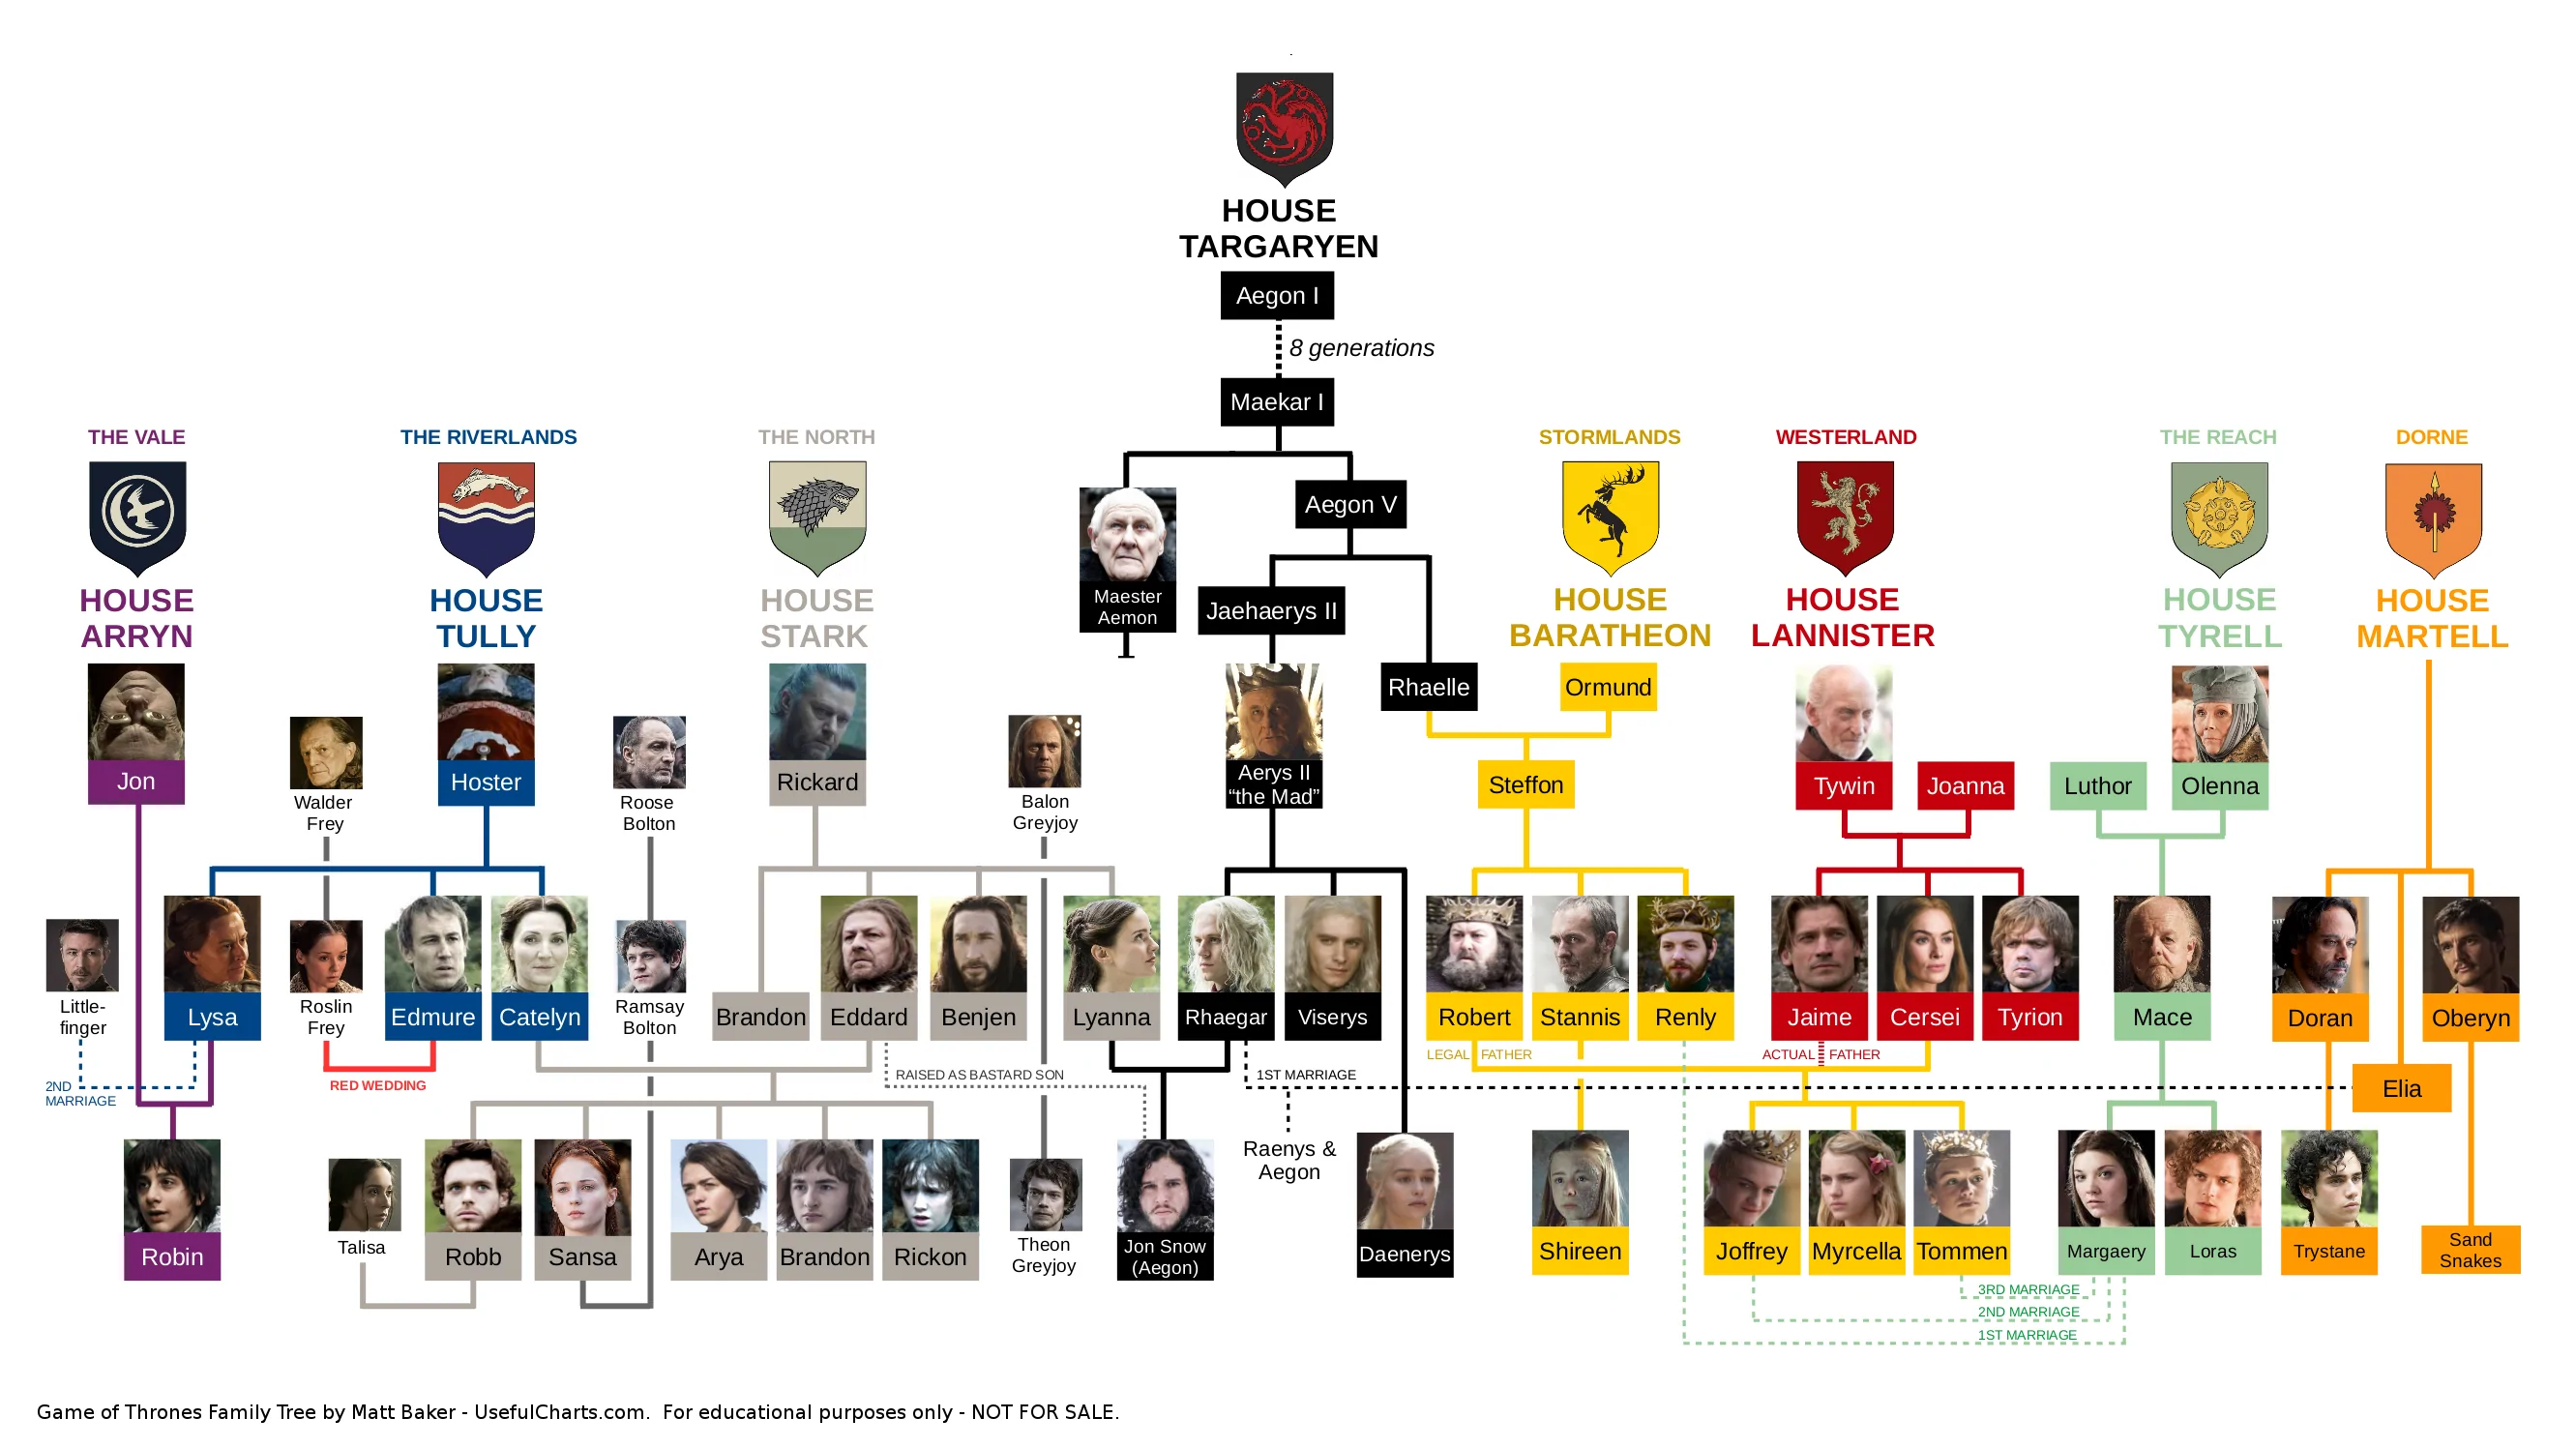

In [12]:
from IPython.display import Image
Image(filename='game-of-thrones-family-tree-season-7_3350358d-a69c-432c-a2d7-60c364913281.png') 

In [13]:
model.wv.most_similar('daenerys')

[('stormborn', 0.799628734588623),
 ('targaryen', 0.7260337471961975),
 ('queen', 0.7210395932197571),
 ('unburnt', 0.6986910104751587),
 ('myrcella', 0.6850898861885071),
 ('princess', 0.6790878176689148),
 ('viserys', 0.6718795895576477),
 ('margaery', 0.660761833190918),
 ('khaleesi', 0.6583470106124878),
 ('elia', 0.6369696259498596)]

In [14]:

model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [15]:

model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [16]:

model.wv['king']

array([ 0.636481  , -0.06193298,  1.0460411 ,  0.7729627 , -1.5996252 ,
       -0.34061092,  1.0936879 ,  0.32086626, -3.113378  , -0.34645957,
       -1.9577997 , -0.76652867, -0.50219226,  1.0956465 , -3.5251734 ,
       -2.6018085 ,  1.1212727 ,  2.4998636 ,  0.766785  , -0.2289999 ,
        2.0770054 , -1.8139162 ,  2.2512112 , -4.484806  , -1.2418128 ,
        0.853098  , -2.726644  , -1.5806836 , -0.30279744,  0.882252  ,
       -2.6488507 , -0.16581325,  1.0856084 , -0.65632206,  2.854291  ,
       -3.2484212 , -0.6713992 , -1.5938185 , -0.06047943, -0.5352769 ,
       -0.31379634,  1.205755  ,  2.1193225 , -0.64388937, -2.2575624 ,
       -1.818222  ,  1.0285411 , -1.0976064 ,  3.8934236 , -1.676625  ,
       -1.7261598 , -0.807123  , -0.8159557 , -4.003719  ,  3.4508548 ,
       -1.194639  ,  1.0688753 ,  1.835312  ,  1.5967859 ,  1.306288  ,
        0.88796973,  0.187634  , -0.38352332, -0.02405771,  2.069197  ,
        1.7235715 , -0.9101327 , -1.5603544 ,  0.20966583, -2.34

In [17]:
model.wv.most_similar(model.wv['king'] - model.wv['man'] + model.wv['woman'])

[('king', 0.8121600151062012),
 ('queen', 0.6561998724937439),
 ('prince', 0.6171014904975891),
 ('targaryen', 0.5876479744911194),
 ('baratheon', 0.5876282453536987),
 ('usurper', 0.5564524531364441),
 ('princess', 0.5561890602111816),
 ('stark', 0.5548279881477356),
 ('wedding', 0.5399236679077148),
 ('tourney', 0.539616048336029)]

In [18]:
model.wv.similarity('arya','sansa')

0.8515304

In [19]:
model.wv.similarity('cersei','sansa')

0.7452798

In [20]:
model.wv.similarity('tywin','sansa')

0.2414712

In [21]:
y = model.wv.index_to_key
y[:10]

['the', 'and', 'to', 'of', 'he', 'his', 'was', 'you', 'her', 'in']

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=3)

In [24]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [25]:
X.shape

(17453, 3)

In [28]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()